### Importando bibliotecas:

In [24]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from wordcloud import WordCloud
from nltk.probability import FreqDist

In [25]:
from configs.limpando_dados import Limpeza

### Carregando datasets salvos:

In [26]:
# Carregando data frame de treino com a coluna acrescentada:

with open("train_df.pkl", "rb") as files:
    train_df = pickle.load(files)
train_df.head(5)

,comment_text,Toxic,pre-processado
0,All of my edits are good. Cunts like you who ...,Toxic,all of my edits are good cunts like you who re...
1,you are a stupid fuck \n\nand your mother's cu...,Toxic,you are a stupid fuck and your mother s cunt s...
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic,and you are let me know when you ve crawled o...
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic,fuck off you are not an administrator you dono...
4,"Have you seen the reference to their claim, yo...",Toxic,have you seen the reference to their claim you...


In [27]:
# Carregando dataframe de teste com a coluna acrescentada:

with open("test_df.pkl", "rb") as files:
    test_df = pickle.load(files)
test_df.head(5)

,comment_text,Toxic,pre-processado
0,"== Arabs are committing genocide in Iraq, but ...",Toxic,arabs are committing genocide in iraq but no ...
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic,i d never think i d need to say it but wikiped...
2,"::No, he is an arrogant, self serving, immatur...",Toxic,no he is an arrogant self serving immature id...
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic,so on the tenth anniversary of new york t...
4,Simple: You are stupid!,Toxic,simple you are stupid


### Analisando quantidade de comentários tóxicos e não-tóxicos:

<AxesSubplot:xlabel='Toxic', ylabel='count'>

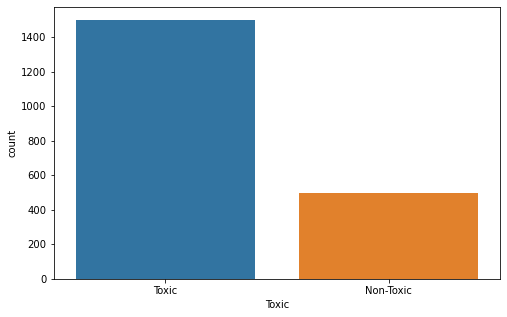

In [28]:
# Visualizando a quantidade de comentários tóxicos e não-tóxicos no dataset de treino:

fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='Toxic',data=train_df)

<AxesSubplot:xlabel='Toxic', ylabel='count'>

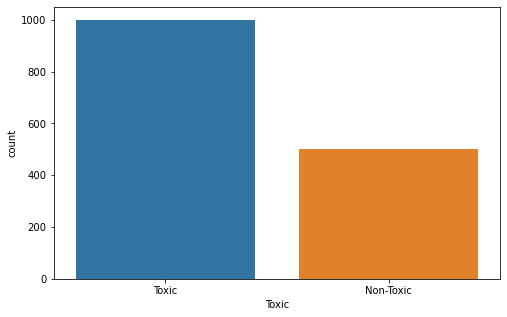

In [29]:
# Visualizando a quantidade de comentários tóxicos e não-tóxicos no dataset de teste:

fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='Toxic',data=test_df)

Os comentários são predominantemente tóxicos.

### Analisando a frequência das palavras:

<AxesSubplot:xlabel='Palavras', ylabel='Frequencia'>

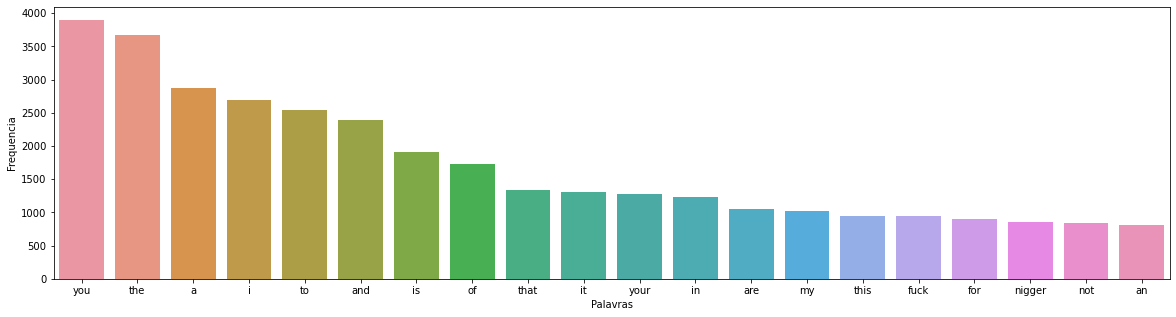

In [30]:
# Visualizando por meio do plot, as palavras mais frequentes no dataset de treino:

corpus = train_df['pre-processado'].tolist()
fdist = FreqDist(" ".join(corpus).split())
palavras_frequentes = fdist.most_common(20)
palavras_frequentes = pd.DataFrame(palavras_frequentes, columns = ['Palavras', 'Frequencia'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Palavras', y='Frequencia', data=palavras_frequentes)

<AxesSubplot:xlabel='Palavras', ylabel='Frequencia'>

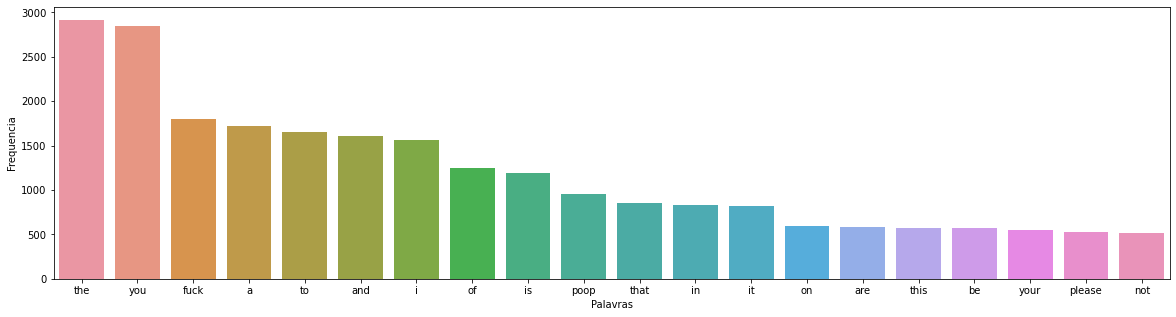

In [31]:
# Visualizando por meio do plot, as palavras mais frequentes no dataset de test:

corpus = test_df['pre-processado'].tolist()
fdist = FreqDist(" ".join(corpus).split())
palavras_frequentes = fdist.most_common(20)
palavras_frequentes = pd.DataFrame(palavras_frequentes, columns = ['Palavras', 'Frequencia'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Palavras', y='Frequencia', data=palavras_frequentes)

Analisando a frequência das palavras, podemos perceber que as que mais se repetem são stop words e palavras de caráter tóxico, reforçando a ideia de que a maioria dos comentários são toxicos e que podemos retirar as stopwords sem que haja perca de sentido.

### Removendo stop words e criando uma nova coluna sem elas:

In [32]:
# Criando uma nova coluna sem as stop words:

# Treino:
train_df['pre-processado-sem-stopwords'] = train_df['pre-processado'].apply(
    lambda x: Limpeza.remover_stopwords(x,stopwords))

# Teste:
test_df['pre-processado-sem-stopwords'] = test_df['pre-processado'].apply(
    lambda x: Limpeza.remover_stopwords(x,stopwords))


### Analisado a frequência de palavras sem as stop words:

<AxesSubplot:xlabel='Palavras', ylabel='Frequencia'>

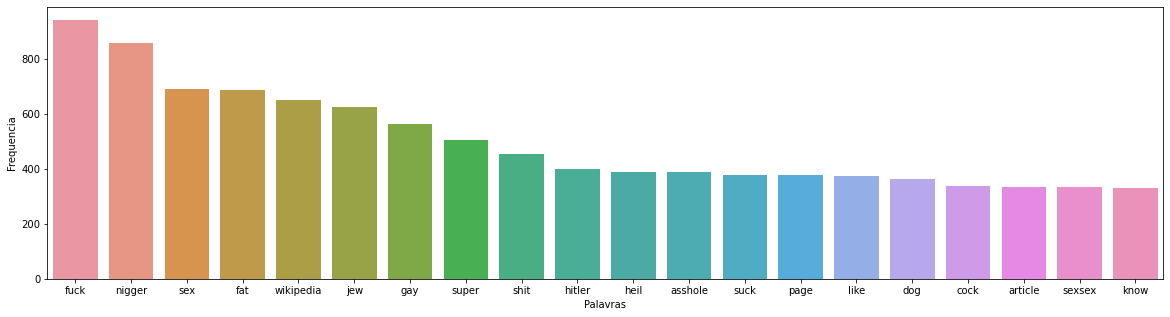

In [33]:
# Visualizando por meio do plot, as palavras mais frequentes sem as stop words no dataset de treino:

corpus = train_df['pre-processado-sem-stopwords'].tolist()
fdist = FreqDist(" ".join(corpus).split())
palavras_frequentes = fdist.most_common(20)
palavras_frequentes = pd.DataFrame(palavras_frequentes, columns = ['Palavras', 'Frequencia'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Palavras', y='Frequencia', data=palavras_frequentes)

<AxesSubplot:xlabel='Palavras', ylabel='Frequencia'>

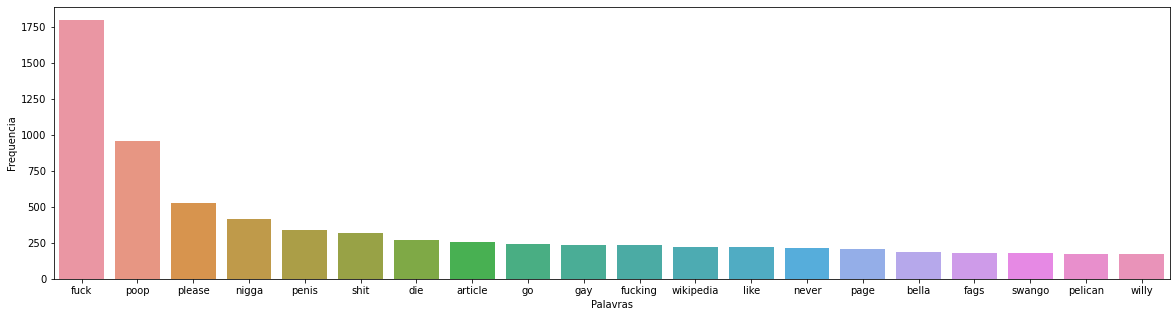

In [34]:
# Visualizando por meio do plot, as palavras mais frequentes sem as stop words no dataset de teste:

corpus = test_df['pre-processado-sem-stopwords'].tolist()
fdist = FreqDist(" ".join(corpus).split())
palavras_frequentes = fdist.most_common(20)
palavras_frequentes = pd.DataFrame(palavras_frequentes, columns = ['Palavras', 'Frequencia'])
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='Palavras', y='Frequencia', data=palavras_frequentes)

Retirando as stop words, a maioria das palavras tem caráter tóxico.

### Criando uma coluna para saber a quantidade de palavras em cada comentário:

In [35]:
# Treino:
train_df['quantidade_de_palavras'] = train_df['pre-processado'].apply(
    lambda x: Limpeza.numero_de_palavras(x))

# Teste:
test_df['quantidade_de_palavras'] = test_df['pre-processado'].apply(
    lambda x: Limpeza.numero_de_palavras(x))

### Analisando a quantidade de palavras dos comentário, dividindo em tóxicos e não-tóxicos:

Text(0.5, 0, 'Quantidade de palavras')

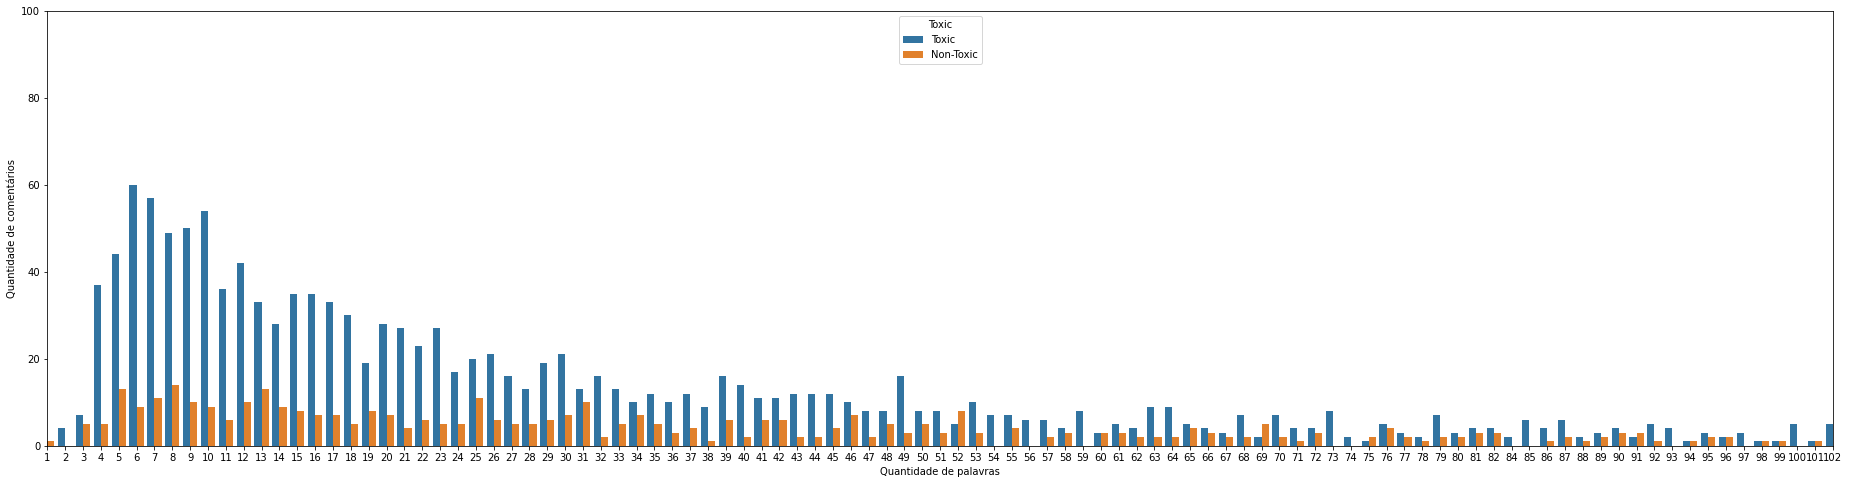

In [36]:
# Visulizando por meio do plot a difewrença entre os comentários tóxicos e não tóxicos no dataset de treino:

fig, ax = plt.subplots(figsize=(32, 8))
plot = sns.countplot(x="quantidade_de_palavras", hue="Toxic", data=train_df)
plt.ylabel('Quantidade de comentários')
plt.xlim((0,100))
plt.ylim((0,100))
plot.set_xlabel("Quantidade de palavras")

Text(0.5, 0, 'Quantidade de palavras')

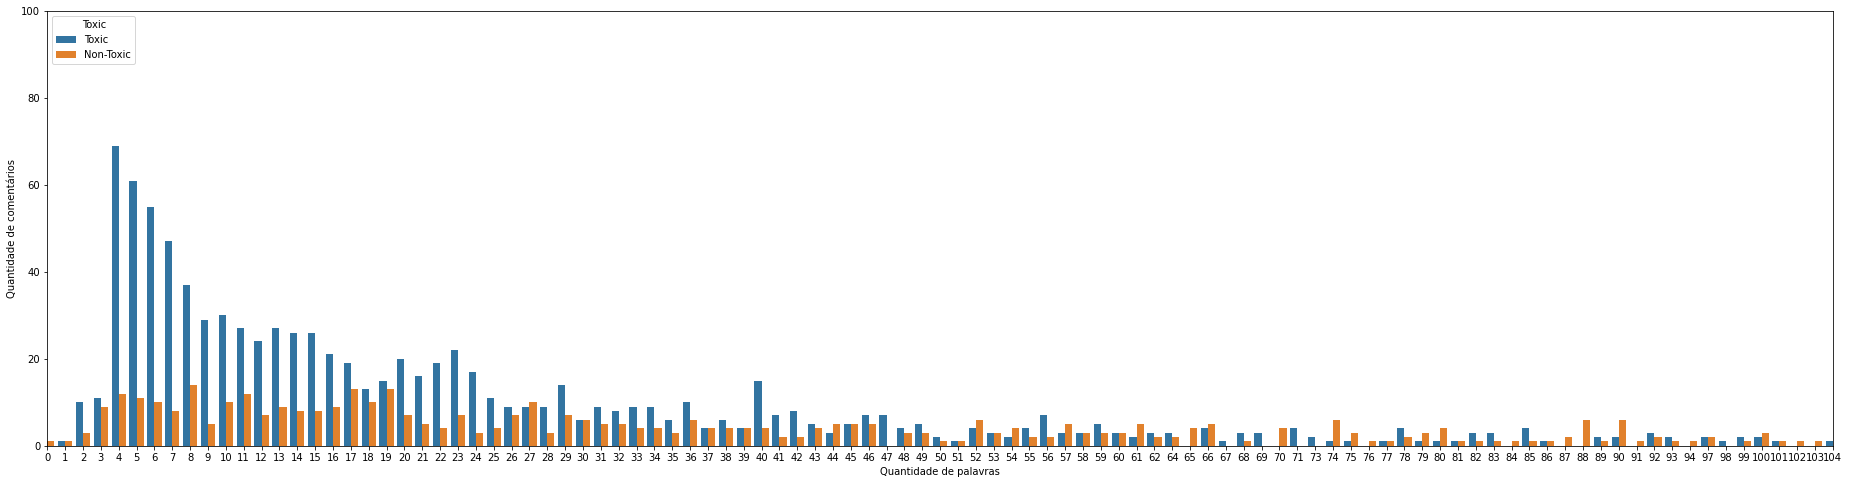

In [37]:
# Visulizando por meio do plot a difewrença entre os comentários tóxicos e não tóxicos no dataset de teste:

fig, ax = plt.subplots(figsize=(32, 8))
plot = sns.countplot(x="quantidade_de_palavras", hue="Toxic", data=test_df)
plt.ylabel('Quantidade de comentários')
plt.xlim((0,100))
plt.ylim((0,100))
plot.set_xlabel("Quantidade de palavras")

A partir desses grafico, podemos ver que os comentários tóxicos são mais curtos e os comentários não-tóxicos são mais longos. Podemos observar também a predominância de comentários tóxicos.

### Word Cloud: Palavras em geral

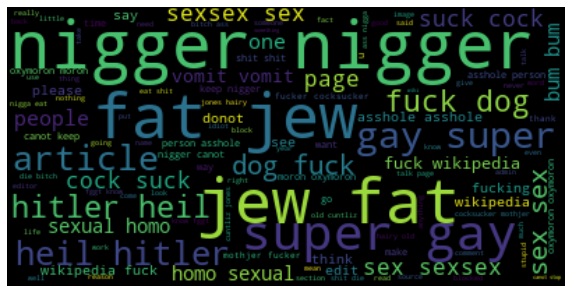

In [38]:
# Visualizando por meio de uma word cloud as palavras no dataset de treino:

fig, ax = plt.subplots(figsize=(10, 8))
corpus = train_df['pre-processado-sem-stopwords'].tolist()
corpus_all = ' '.join(corpus)
wc = WordCloud().generate(corpus_all)
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

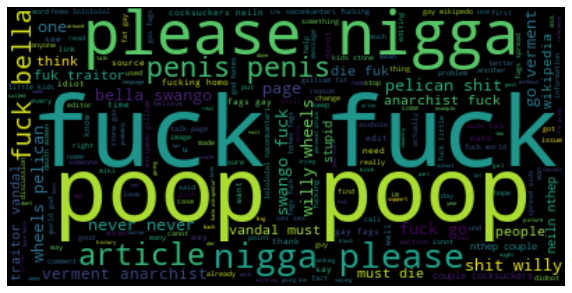

In [39]:
# Visualizando por meio de uma word cloud as palavras no dataset de test:

fig, ax = plt.subplots(figsize=(10, 8))
corpus = test_df['pre-processado-sem-stopwords'].tolist()
corpus_all = ' '.join(corpus)
wc = WordCloud().generate(corpus_all)
ax.imshow(wc, interpolation='bilinear')
ax.set_axis_off()

Usando nuvem de palavras, essas são as palavras que aparecem no texto em geral, a grande maioria das palavras são tóxicas.

### Salvando dataframes com as modificações:

In [40]:
with open('train_df_mod.pkl', 'wb') as files:
    pickle.dump(train_df, files)

In [41]:
with open('test_df_mod.pkl', 'wb') as files:
    pickle.dump(test_df, files)